In [183]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [184]:
data=pd.read_csv('weather_data.csv')
weather_data=data.copy()



A.DATA PROCESSING

In [185]:
#chuyển cột 'datetime' sang định dạng thời gian và đặt cột 'datetime' làm index cho dataframe
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])
weather_data =weather_data.set_index(pd.DatetimeIndex(weather_data['datetime']))
weather_data.head()

,datetime,temp,dew,humidity,precip,precipprob,windspeed,winddir,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,icon,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
datetime,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,2018-01-01 00:00:00,22.0,19.0,83.16,0.000,0,3.6,40.0,78.6,5.0,0.0,NaN,0.0,Partially cloudy,partly-cloudy-night,NaN,NaN,NaN,NaN
2018-01-01 01:00:00,2018-01-01 01:00:00,21.9,19.4,86.13,2.989,100,3.6,79.0,78.6,8.6,0.0,NaN,0.0,"Rain, Partially cloudy",rain,NaN,NaN,NaN,NaN
2018-01-01 02:00:00,2018-01-01 02:00:00,21.0,19.0,88.39,0.000,0,3.6,350.0,78.6,5.0,0.0,NaN,0.0,Partially cloudy,partly-cloudy-night,NaN,NaN,NaN,NaN
2018-01-01 03:00:00,2018-01-01 03:00:00,21.0,20.0,94.04,0.000,0,0.0,0.0,78.6,5.0,0.0,NaN,0.0,Partially cloudy,partly-cloudy-night,NaN,NaN,NaN,NaN
2018-01-01 04:00:00,2018-01-01 04:00:00,21.1,19.9,92.80,0.000,0,0.0,360.0,78.6,8.6,0.0,NaN,0.0,Partially cloudy,partly-cloudy-night,NaN,NaN,NaN,NaN


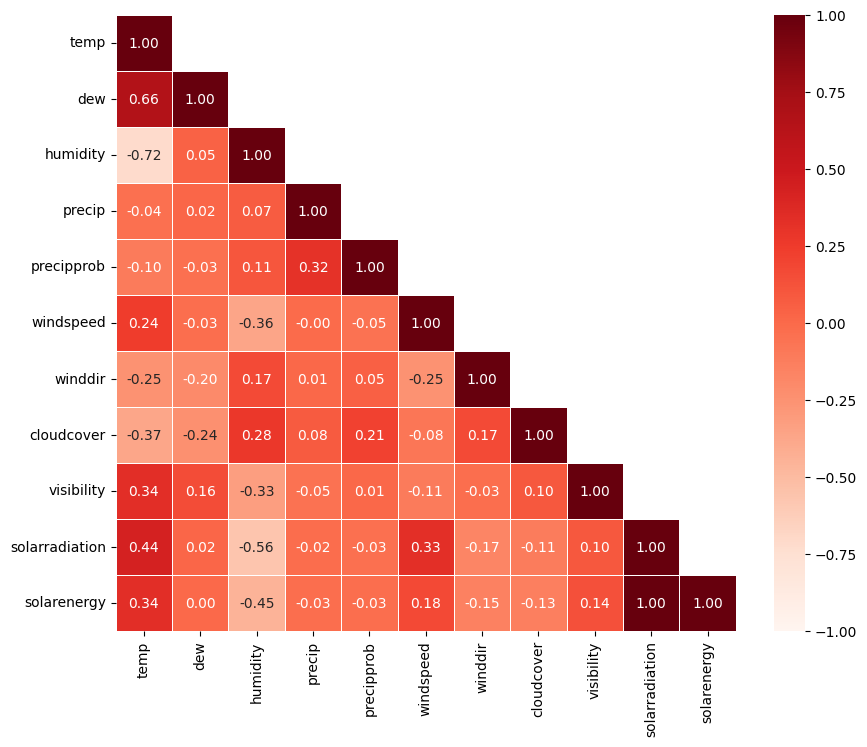

In [186]:
weather_data_y=pd.DataFrame(weather_data[['conditions','icon']])
weather_data=pd.DataFrame(weather_data[['temp','dew','humidity','precip','precipprob','windspeed','winddir','cloudcover','visibility','solarradiation','solarenergy']])

#su tương quan giua cac bien trong du lieu 
weather_corr=weather_data.corr()

one_corr=np.ones_like(weather_corr,dtype=bool)
#tạo một mảng  toàn số 1 mới có kích thước giống với weather_corr
mask=np.triu(one_corr,1)
## lấy phần tử trên và phía trên đường chéo chính và đặt các phần tử khác bằng 0

mask_new=mask[1:,1:-2]

fig,ax=plt.subplots(figsize=(10,8))
sns.heatmap(data=weather_corr,mask=mask,annot=True,fmt=".2f",cmap="Reds",vmin=-1,vmax=1
            ,linecolor="white",linewidths=0.5,ax=ax)
plt.show()
#tạo ra biểu đồ nhiệt từ ma trận weather_corr và sử dụng mask để che dấu các phần tử nằm trên và phía trên đường chéo chính

<Axes: >

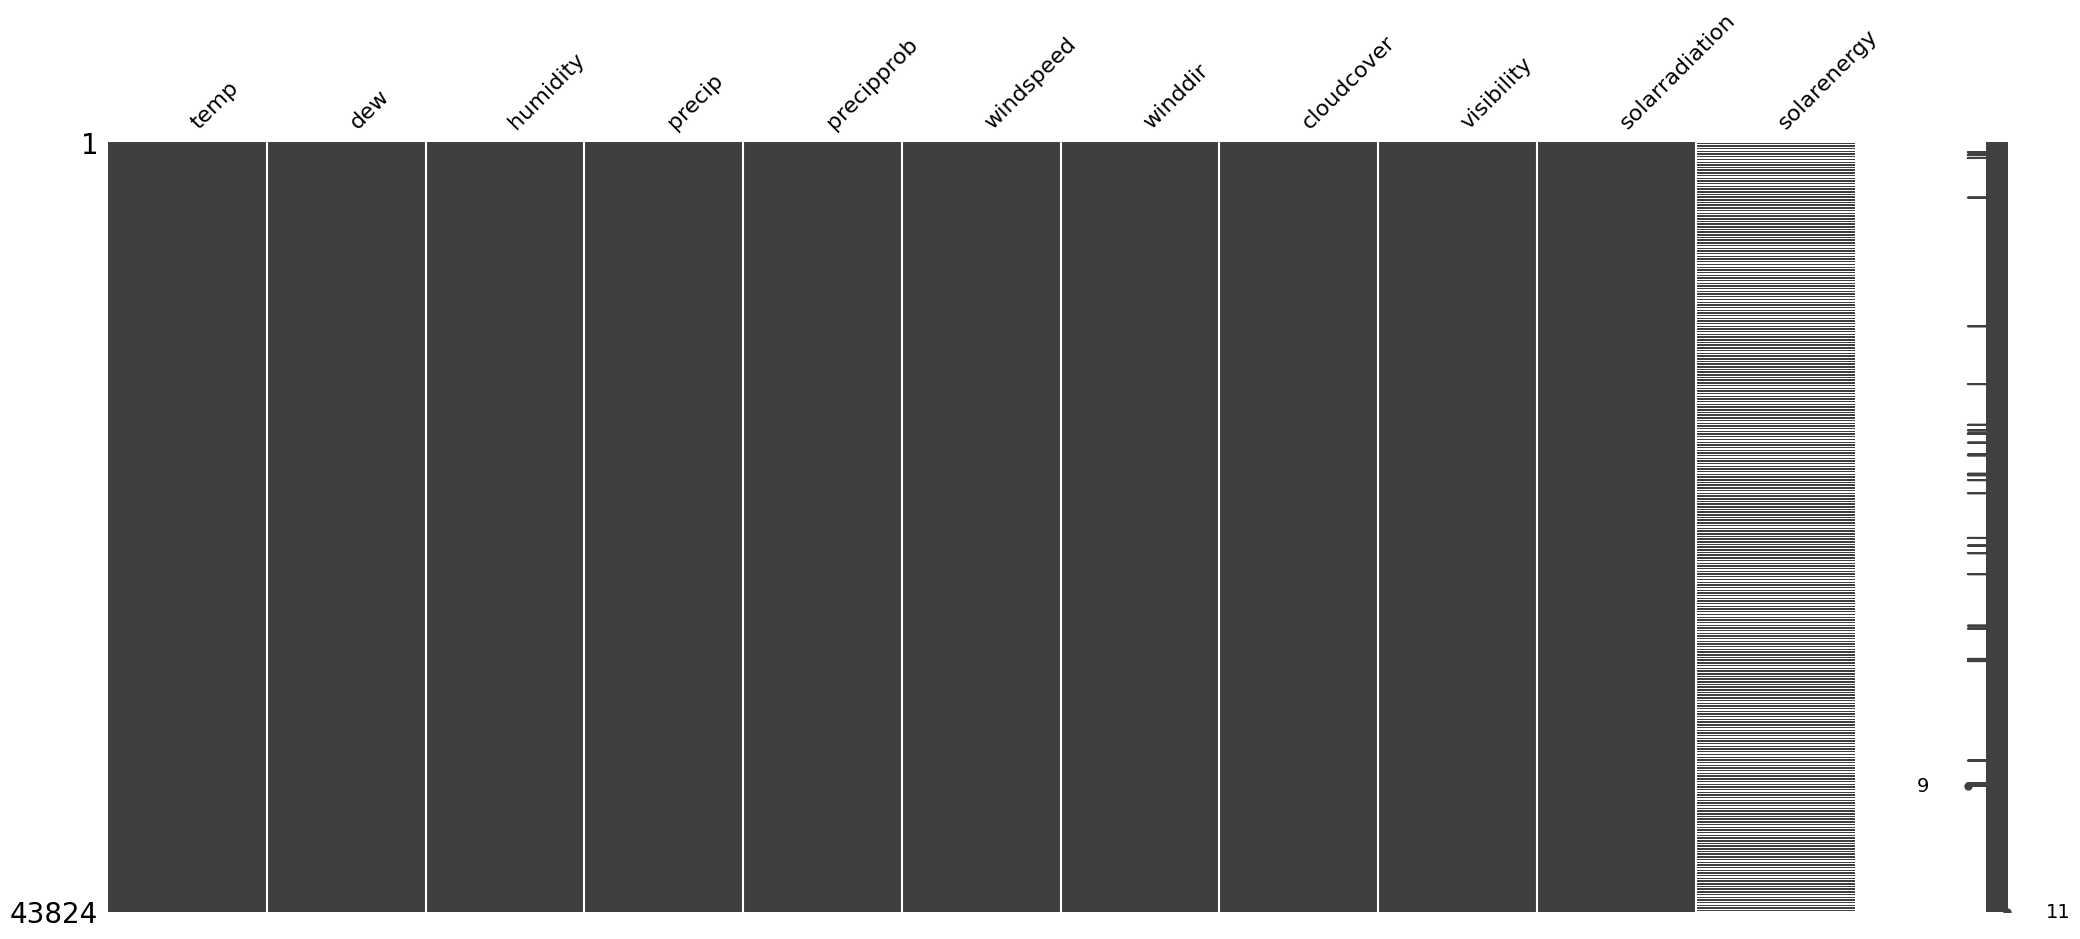

In [187]:
#xử lý dữ liệu trống
import missingno as msno
msno.matrix(weather_data)

In [188]:
weather_data['solarenergy']=weather_data['solarenergy'].fillna(0)
weather_data['visibility']=weather_data['visibility'].fillna(weather_data['visibility'].mean())
weather_data['solarradiation']=weather_data['solarradiation'].fillna(weather_data['solarradiation'].mean())
# print(weather_data[weather_data.isna().any(axis=1)])

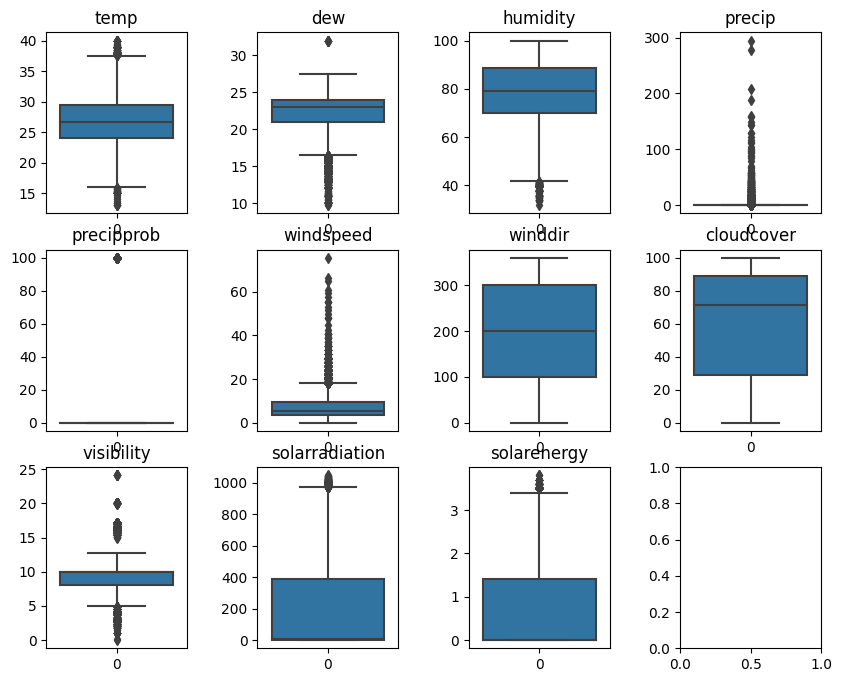

In [189]:
#Xử lý ngoại lệ

fig_boxplot,ax_boxplot=plt.subplots(3,4,figsize=(10,8))

for n, column in enumerate(weather_data.columns):
    j=n//4
    i=n%4
    sns.boxplot(data=weather_data[column].values, ax=ax_boxplot[j][i],labels=[column])
    ax_boxplot[j][i].set_title(column)

# Hiển thị biểu đồ
plt.subplots_adjust(wspace=0.5)
plt.show()

In [190]:
# outliers temp
outliers_temp_upper = weather_data['temp'] >37
weather_data.loc[outliers_temp_upper,'temp']=37

outliers_temp_lowwer = weather_data['temp'] <17
weather_data.loc[outliers_temp_lowwer,'temp']=17

#ouliers dew
# IQR_dew=weather_data.dew.quantile(0.75)-weather_data.dew.quantile(0.25)

outliers_dew_upper=weather_data['dew']>weather_data['dew'].quantile(0.75)
weather_data.loc[outliers_dew_upper,'dew']=weather_data['dew'].quantile(0.75)

outliers_dew_lower=weather_data['dew']<weather_data['dew'].quantile(0.25)
weather_data.loc[outliers_dew_lower,'dew']=weather_data['dew'].quantile(0.25)

#outliers humidity

outliers_humidity_lower=weather_data['humidity']<weather_data.humidity.quantile(0.25)
weather_data.loc[outliers_humidity_lower,'humidity']=weather_data['humidity'].mean()

#outliers windspeed
outliers_windspeed_upper=weather_data['windspeed']>weather_data.windspeed.quantile(0.75)
weather_data.loc[outliers_windspeed_upper,'windspeed']=weather_data['windspeed'].quantile(0.75)

#outliers visibility
outliers_visibility_lower=weather_data['visibility']<5
weather_data.loc[outliers_visibility_lower,'visibility']=5

outliers_visibility_upper=weather_data['visibility']>weather_data.visibility.quantile(0.75)
weather_data.loc[outliers_visibility_upper,'visibility']=weather_data.visibility.quantile(0.75)

#outliers solarradiation
outliers_solarradiation_upper=weather_data['solarradiation']>weather_data.solarradiation.quantile(0.75)
weather_data.loc[outliers_solarradiation_upper,'solarradiation']=weather_data.solarradiation.quantile(0.75)




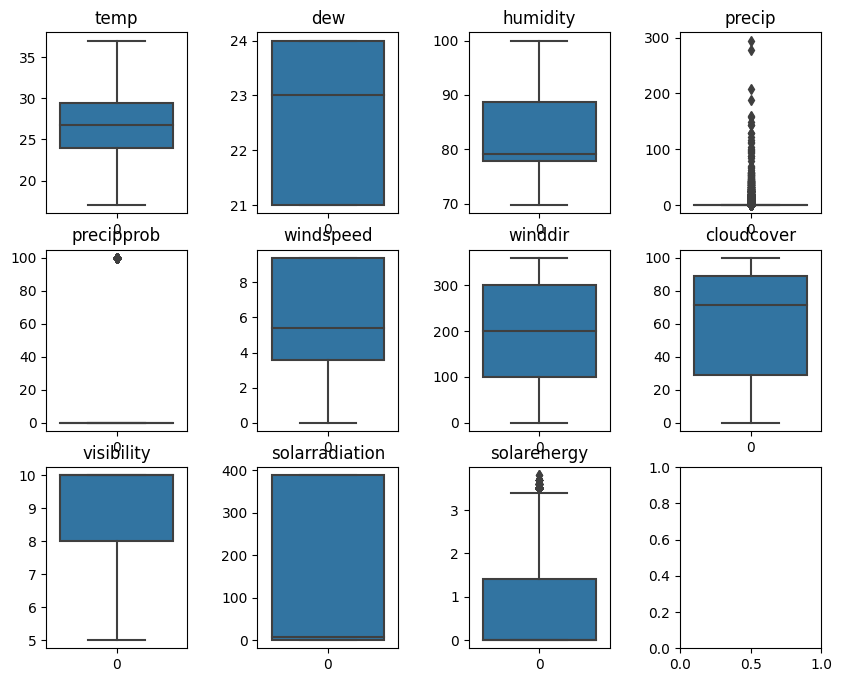

In [191]:
fig_boxplot,ax_boxplot=plt.subplots(3,4,figsize=(10,8))

for n, column in enumerate(weather_data.columns):
    j=n//4
    i=n%4
    sns.boxplot(data=weather_data[column].values, ax=ax_boxplot[j][i],labels=[column])
    ax_boxplot[j][i].set_title(column)

# Hiển thị biểu đồ
plt.subplots_adjust(wspace=0.5)
plt.show()

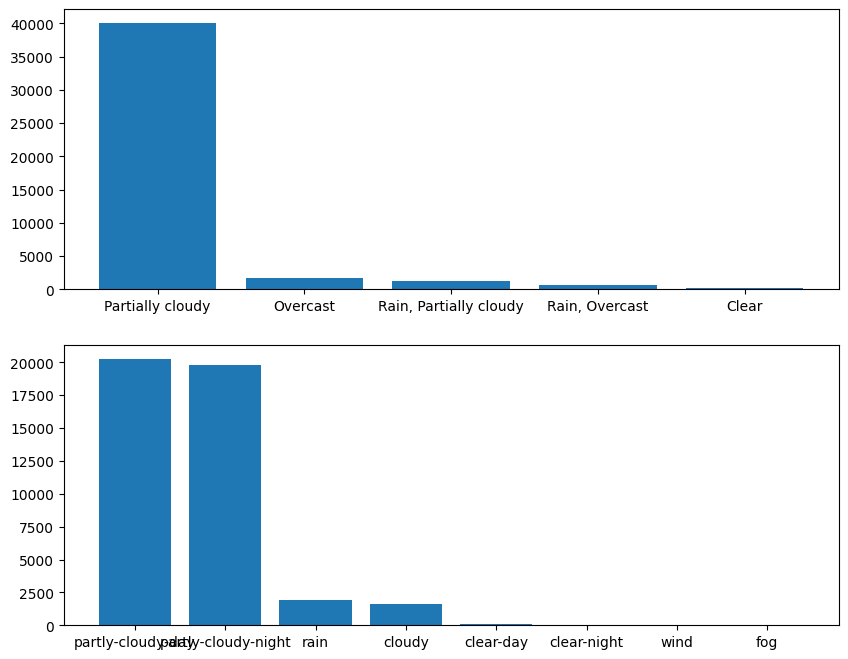

In [192]:
count_condition = weather_data_y['conditions'].value_counts()
count_icon=weather_data_y['icon'].value_counts()
# Tạo biểu đồ cột
fig_count,(ax_count1,ax_count2)=plt.subplots(2,1,figsize=(10,8))
ax_count1.bar(count_condition.index, count_condition.values)
ax_count2.bar(count_icon.index, count_icon.values)
plt.show()

array([[<Axes: title={'center': 'conditions'}>,
        <Axes: title={'center': 'icon'}>]], dtype=object)

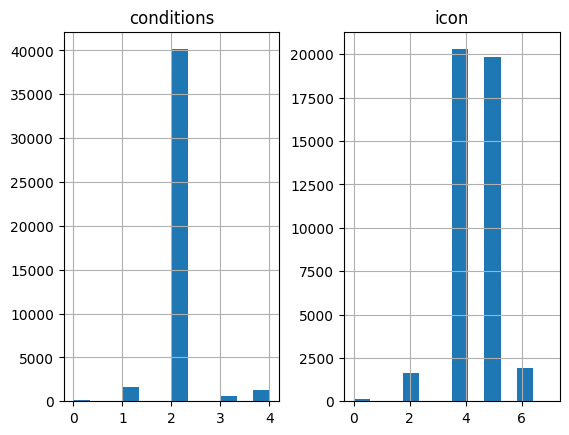

In [193]:
#xử lý dữ liệu string
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()


weather_data_y['conditions'] =encoder.fit_transform(weather_data_y['conditions'])
weather_data_y['icon'] =encoder.fit_transform( weather_data_y['icon'])


weather_data_y.hist(bins=12)
# weather_data_y['conditions'].value_counts()


condition:
{'Partially cloudy':2,  'Overcast':1, 'Rain, Partially cloudy':4 ,'Rain, Overcast':3 ,'clear':0}

icon:

{'partly-cloudy-day':4  ,partly-cloudy-night:5 ,rain:6  ,,'cloudy': 2 ,'clear-day': 0 'clear-night':1 'wind': 7,'fog': 3  }

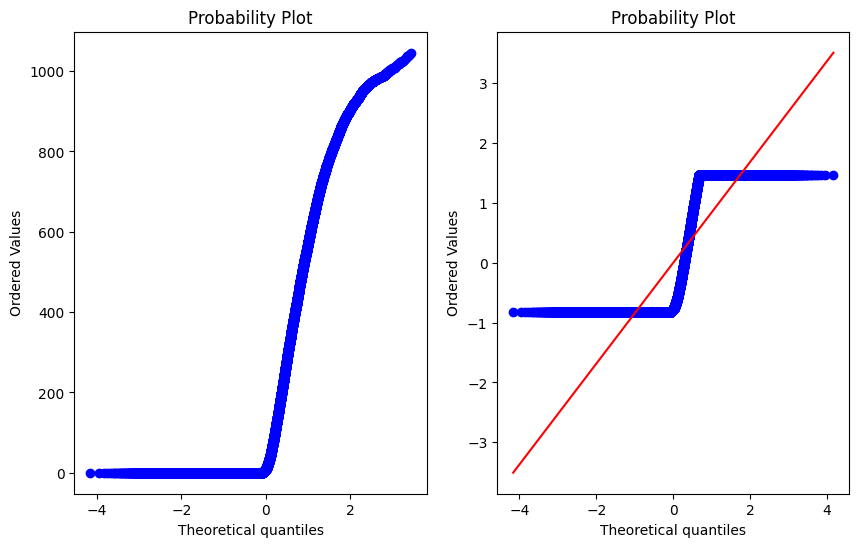

In [194]:
#chuẩn hóa dữ liệu
from sklearn.preprocessing import StandardScaler,Normalizer
import scipy.stats as stat
def plot_data(weather_data,weather_data_standardized,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    stat.probplot(weather_data[feature],plot=plt)# prob plot
    plt.subplot(1,2,2)
    stat.probplot(weather_data_standardized[feature],plot=plt)# prob plot
    plt.show()

def fit_transform(X):
    X_fit=pd.DataFrame(StandardScaler().fit_transform(X),columns=X.columns,index=X.index)
    return X_fit

weather_data_standardized=fit_transform(weather_data)
plot_data(data,weather_data_standardized,'solarradiation')

In [195]:
# lựa chọn đặc trưng 
from sklearn.feature_selection import VarianceThreshold

VarianceThreshold(0.9).fit_transform(weather_data_standardized).shape

# =>> ta thấy dữ liệu đều biến động lớn
#->> sẽ dùng grid search

(43824, 11)

In [196]:
# Select training and testing data

train_start_date = '2018-01-01'
train_end_date = '2021-12-31'
test_start_date = '2022-01-01'
test_end_date = '2022-12-31'


X_train_data = weather_data_standardized.loc[train_start_date:train_end_date]
y_train_conditions=weather_data_y['conditions'].loc[train_start_date:train_end_date]
y_train_icon=weather_data_y['icon'].loc[train_start_date:train_end_date]


X_test_data = weather_data_standardized.loc[test_start_date:test_end_date]
y_test_conditions = weather_data_y['conditions'].loc[test_start_date:test_end_date]
y_test_icon = weather_data_y['icon'].loc[test_start_date:test_end_date]

X_train_data=X_train_data[:-24]
y_train_conditions=y_train_conditions[24:]



X_train_data.shape:(35064, 11)
y_train_data.shape: (35064, 2)

B
B.1 Data Preparation

In [197]:
n_features = X_train_data.shape[1]

X_train = X_train_data.values.reshape((-1, 24, n_features))
X_test = X_test_data.values.reshape((-1, 24, n_features))

y_train_conditions=y_train_conditions.values.reshape((-1,24,1))
y_test_conditions=y_test_conditions.values.reshape((-1,24,1))

y_train_icon=y_train_icon.values.reshape((-1,24,1))
y_test_icon=y_test_icon.values.reshape((-1,24,1))

X_test.shape

(365, 24, 11)

In [198]:
# import array
# def to_supervised(train, n_input, n_out=7):
#  # flatten data
#     data = train.reshape((train.shape[0]*train.shape[1], train.shape[2]))
#     X, y = list(), list()
#     in_start = 0
#     # step over the entire history one time step at a time
#     for _ in range(len(data)):
#     # define the end of the input sequence
#         in_end = in_start + n_input
#         out_end = in_end + n_out
#         # ensure we have enough data for this instance
#         if out_end <= len(data):
#             X.append(data[in_start:in_end, :])
#             y.append(data[in_end:out_end, 0])
#         # move along one time step
#         in_start += 1
#     return array(X), array(y)
# # Số lượng input và output
# n_input = 24
# n_out = 24

# # Chuyển đổi dữ liệu X_train thành supervised learning
# X_train_supervised, y_train_supervised = to_supervised(X_train, n_input, n_out)

# # Chuyển đổi y_train theo chiều thời gian
# y_train_supervised = y_train_supervised.reshape((y_train_supervised.shape[0], y_train_supervised.shape[1], 1))


In [199]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import math
from sklearn.metrics import mean_squared_error


model = Sequential()

model.add(LSTM(50,activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])))

model.add(Dense(24))

# model.add(LSTM(50,activation='tanh'))


model.compile(loss='mse', optimizer='adam')

model.fit(X_train,y_train_conditions, epochs=50, batch_size=72,verbose=2, shuffle=False)

y_test_pred = model.predict(X_test)

# test_rmse = mean_squared_error(y_test_data, y_test_pred)
# print("Test RMSE: ", test_rmse)
# y_pred= model.predict(X_test)


Epoch 1/50
21/21 - 2s - loss: 4.0291 - 2s/epoch - 92ms/step
Epoch 2/50
21/21 - 0s - loss: 2.8239 - 408ms/epoch - 19ms/step
Epoch 3/50
21/21 - 0s - loss: 0.8221 - 401ms/epoch - 19ms/step
Epoch 4/50
21/21 - 0s - loss: 0.1947 - 421ms/epoch - 20ms/step
Epoch 5/50
21/21 - 0s - loss: 0.1559 - 410ms/epoch - 20ms/step
Epoch 6/50
21/21 - 0s - loss: 0.1505 - 416ms/epoch - 20ms/step
Epoch 7/50
21/21 - 0s - loss: 0.1477 - 429ms/epoch - 20ms/step
Epoch 8/50
21/21 - 0s - loss: 0.1462 - 394ms/epoch - 19ms/step
Epoch 9/50
21/21 - 0s - loss: 0.1451 - 394ms/epoch - 19ms/step
Epoch 10/50
21/21 - 0s - loss: 0.1441 - 412ms/epoch - 20ms/step
Epoch 11/50
21/21 - 0s - loss: 0.1432 - 400ms/epoch - 19ms/step
Epoch 12/50
21/21 - 0s - loss: 0.1423 - 402ms/epoch - 19ms/step
Epoch 13/50
21/21 - 0s - loss: 0.1416 - 433ms/epoch - 21ms/step
Epoch 14/50
21/21 - 0s - loss: 0.1408 - 416ms/epoch - 20ms/step
Epoch 15/50
21/21 - 0s - loss: 0.1402 - 438ms/epoch - 21ms/step
Epoch 16/50
21/21 - 0s - loss: 0.1395 - 448ms/epoch 

In [200]:
from sklearn.metrics import accuracy_score
y_test_flat = y_test_conditions.ravel()

y_test_pred = y_test_pred.round().astype(int)

y_pred_flat = y_test_pred.ravel()
accuracy = accuracy_score(y_test_flat, y_pred_flat)


# np.savetxt('data.csv', y_test_pred, delimiter=',')
print(accuracy)
y_pred_flat

0.8897260273972603


array([2, 3, 2, ..., 2, 2, 2])

In [201]:
# y_test_flat
# y_test_=np.array_split(y_test_flat, 365)
# y_pred_=np.array_split(y_pred_flat, 365)
# y_test_

In [202]:
# y_pred_=np.array_split(y_pred_flat, 365)
# y_pred_

In [203]:

weather_data_y_test=weather_data_y.loc['2022']
decoded_labels_pred = encoder.inverse_transform(y_pred_flat)
df_y_pred=pd.DataFrame({'conditions_pred': decoded_labels_pred, 'conditions_test': encoder.inverse_transform(y_test_flat)},index=weather_data_y_test.index)

df_y_pred


,conditions_pred,conditions_test
datetime,,
2022-01-01 00:00:00,cloudy,cloudy
2022-01-01 01:00:00,fog,cloudy
2022-01-01 02:00:00,cloudy,cloudy
2022-01-01 03:00:00,cloudy,cloudy
2022-01-01 04:00:00,cloudy,cloudy
...,...,...
2022-12-31 19:00:00,cloudy,cloudy
2022-12-31 20:00:00,cloudy,cloudy
2022-12-31 21:00:00,cloudy,cloudy


In [204]:
X_day_train = X_test[55:56, :, :]

y_day_pred=model.predict(X_day_train)
y_day_pred= np.squeeze(y_day_pred)

y_day_test=y_test_conditions[56:57,:,:]
y_day_pred=y_day_pred.round().astype(int)
y_day_test=y_day_test.reshape(-1)

print(accuracy_score(y_day_pred,y_day_test))
y_day_pred= encoder.inverse_transform(y_day_pred)
y_day_pred


1/1 [==============================] - 0s 22ms/step
0.875


array(['cloudy', 'fog', 'cloudy', 'cloudy', 'cloudy', 'cloudy', 'cloudy',
       'cloudy', 'cloudy', 'cloudy', 'cloudy', 'cloudy', 'cloudy', 'fog',
       'cloudy', 'cloudy', 'cloudy', 'cloudy', 'cloudy', 'cloudy',
       'cloudy', 'cloudy', 'cloudy', 'cloudy'], dtype=object)